###Part A-  Choosing The dataSet

I recently watched a documentary about the diamond's import and export from South Africa. From this, I got inspired to do some data analysis about the diamonds, so that I can gain some rich insights. Since I don't have any knowledge apart from its shiny look, I decided to search about the data and stumbled upon the dataset provided by Shivam Agarwal in kaggle. Surprisingly the dataset contained an enormous amount of detail about the properties of the diamond such as its price, shape, and other attributes. Therefore, given the vast amount of data, I decided to choose this dataset and perform exploratory data analysis.




###Part B - Obtaining Data

The dataset file which is available in kaggle is in CSV format, so we decided to upload the file into google drive using a module called "drive" and mounted it into colab.
While mounting the google drive into colab the google will provide a link and text field for authorization code, clicking on the link will redirect to another web page and the authorization code will be generated which we need to copy and paste it in the text field provided for authorization code.
Furthermore, access the file using the panda library to store the CSV file data into a variable to explore the data further. 

In [0]:

from google.colab import drive

import pandas as pd
from pandas import DataFrame,Series
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
from sklearn.preprocessing import MinMaxScaler,StandardScaler,PolynomialFeatures
from sklearn import preprocessing

from sklearn.linear_model import LinearRegression,Ridge,Lasso, ElasticNet,SGDRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score

from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 
from sklearn.pipeline import Pipeline

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [0]:
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
data = pd.read_csv('/content/drive/My Drive/CS-890ACAssignment/diamonds.csv')



###Part C- Scrubbing  and Formatting

In [0]:
print(data.head())


   Unnamed: 0  carat      cut color clarity  ...  table  price     x     y     z
0           1   0.23    Ideal     E     SI2  ...   55.0    326  3.95  3.98  2.43
1           2   0.21  Premium     E     SI1  ...   61.0    326  3.89  3.84  2.31
2           3   0.23     Good     E     VS1  ...   65.0    327  4.05  4.07  2.31
3           4   0.29  Premium     I     VS2  ...   58.0    334  4.20  4.23  2.63
4           5   0.31     Good     J     SI2  ...   58.0    335  4.34  4.35  2.75

[5 rows x 11 columns]


We can see from the above data that there is an unnamed column that provides indexing. Since Pandas itself provides the indexing of the data, the "unnamed" column is unnecessary. Therefore, we will drop that column.



In [0]:
del data[data.columns[0]]

Now let us check any null values is present in the data.

In [0]:
data.isnull().values.any()

False

Fortunately, there were no null values present in this dataset as we can see from the above IsNull() function output which returns true if any null values present in the data frame and false if there are no null values.

####Diamonds

<p>Four main features(also known as 4 C's) which are used to access the quality of a diamond, are listed down below.<p>
<ol>
  <li> Carat Weight</li>
<li> Cut</li>
<li> Clarity</li>
<li> Color</li>
</ol>

<h4> Carat Weight </h4>

<p>Carat is a metric that is used to measure the weight of a diamond. One carat is equivalent to 200mg. Diamond prices increase with diamond carat weight, which means bigger the diamond higher the price.
If two diamonds weights are equal, then other features are used to determine the price.

</p>

<h4> Clarity </h4>
<p>Diamonds are generated from sheer pressure and heat below the ground. Therefore, there will be some inclusion inside a diamond i.e., a mark or line pattern inside a diamond.
Also, there will be a mark or line in the outer layer of a diamond, which is called blemishes.

Based on the amount of inclusion and blemishes, the clarity of a diamond is categorized such as FL, IF, VSS1, VSS2, VS1, VS2, SI1, SI2, I1, I2, I3.
 
  The categories mentioned above are ordered in descending order by the amount of presence of inclusion and blemishes.
 
 </p>
 <h4> Cut</h4>
 <p>  This feature is an important thing to notice in a diamond as it measures three crucial things, such as :

  <li>Brilliance: It means the brightness of a diamond by the reflection of white lights inside and outside of a diamond.</li>
  <li> Fire: It means Scattering of white light into all the colors of the rainbow.</li>
  <li> Scintillation: the amount of sparkle produced and the pattern of light and dark areas caused by reflection within a diamond.</li>
</p>

The goal is to cut a diamond within an appropriate size shape, and angle such that the light entering the diamond should reflect and leave from the top surface.

The other Features of a Cut are the Depth Percentage and Table percentage.

  <h5> Depth %</h5>
Depth is the distance from a top surface i.e., table to a culet.
  The depth percentage is calculated by dividing the diamond depth by the overall width of a diamond. 
  Lower the depth percentage the bigger the diamond looks from the below i.e., pavilion.

  <h5> Table % </h5>

  The table is the topmost surface of a diamond and also the most significant facet of the round diamond. An appropriate width of a table will allow the light to enter and reflect on the appropriate direction .if not most of the light will scatter off in different directions.
  The table percentage is calculated by dividing the table width by overall diamond width.


The following five categories measure the quality of Cut.

<li>Excellent</li>
<li>Very Good</li>
<li>Good</li>
<li>Fair </li>
<li>Poor </li>

<h4>Color</h4>
 
Color measurement in diamond measures lacks color. If the diamond color is like a drop of water that is colorless, it will have a high value. As then only it can scatter the light without observing.
 However, there are some diamonds that are in different colors will have higher prices, but here in the dataset, we are going to only look at the colorless diamonds.
 
The color scale is categorized from D to Z letters and ordered in ascending by the amount of presence of color in a diamond.
From the K onwards to till Z, we can see a yellowish color present. 

D ,E,F - Colorless
G,H,I,J - Near colorlessness
K, L, M - Faint color
N-R: Very Light Color
S-Z: light color


<h4>Length,Width, and Depth</h4>

The dimension of a diamond is measured in millimeters. Moreover, the shape of a diamond is determined by the Length to width ratio. 
For instance, to determine the roundness of a diamond, we need to check the L/W ratio, If the ratio is between 1 and 1.05, it is a round diamond, and an oval shape diamond L/W ratio can be around 1.50 or less.

After learning  about the diamonds in detail, Let's look into the dataset and check what features are available and what are their instances.

####Modifying the Column Name

In [0]:
print(data.head())

   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75


From above we can see that the column names are not clear and are misguiding. Therefore, let us rename the columns So that we can have a better understanding.<br>
The following columns are going to be replaced.
<hr>
<b>Existing   &nbsp;&nbsp;&nbsp;&nbsp;     Replaced</b><br>
<hr>
depth       &nbsp;&nbsp;&nbsp;&nbsp;   ->  depth %<br>
table        &nbsp;&nbsp;&nbsp;&nbsp;&nbsp   ->  table %<br>
  x             &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp  ->  length<br>
  y             &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp ->  width<br>
  z             &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp ->  depth<br>

In [0]:
data.rename(columns={"x": "length", "y": "width", "z" : "depth","depth" : "depth %", "table": "table %"},inplace = True)
data.head(1)

,carat,cut,color,clarity,depth %,table %,price,length,width,depth
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43


Now, we can see that the length/width ratio information is not present in the dataset. However, we have length and width information. Therefore, we will create another column called L/W ratio by dividing the length by width and see how it correlates with our other features later.

In [0]:
data['L/W'] = data['length']/data['width']


In [0]:
print(data.head())

   carat      cut color clarity  depth %  ...  price  length  width  depth       L/W
0   0.23    Ideal     E     SI2     61.5  ...    326    3.95   3.98   2.43  0.992462
1   0.21  Premium     E     SI1     59.8  ...    326    3.89   3.84   2.31  1.013021
2   0.23     Good     E     VS1     56.9  ...    327    4.05   4.07   2.31  0.995086
3   0.29  Premium     I     VS2     62.4  ...    334    4.20   4.23   2.63  0.992908
4   0.31     Good     J     SI2     63.3  ...    335    4.34   4.35   2.75  0.997701

[5 rows x 11 columns]


Before going any further for cleaning and formatting the data let us first know about diamonds and the column values present in the dataset.

### Part D - Exploratory Data Analysis

Until now, we were formatting the data and added new features. Now let us explore the data to find out any exciting pattern or any anomaly.

In [0]:

print(data.info())
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth %    53940 non-null float64
table %    53940 non-null float64
price      53940 non-null int64
length     53940 non-null float64
width      53940 non-null float64
depth      53940 non-null float64
L/W        53933 non-null float64
dtypes: float64(7), int64(1), object(3)
memory usage: 4.5+ MB
None
(53940, 11)


From above we can see that there are three features which are categorical and others are continuous and also the dimension of the data 53940,11, which means there are 11 features and 53940 rows. Now let us look at the data.

In [0]:
print(data.head())
print(data.tail())

   carat      cut color clarity  depth %  ...  price  length  width  depth       L/W
0   0.23    Ideal     E     SI2     61.5  ...    326    3.95   3.98   2.43  0.992462
1   0.21  Premium     E     SI1     59.8  ...    326    3.89   3.84   2.31  1.013021
2   0.23     Good     E     VS1     56.9  ...    327    4.05   4.07   2.31  0.995086
3   0.29  Premium     I     VS2     62.4  ...    334    4.20   4.23   2.63  0.992908
4   0.31     Good     J     SI2     63.3  ...    335    4.34   4.35   2.75  0.997701

[5 rows x 11 columns]
       carat        cut color clarity  ...  length  width  depth       L/W
53935   0.72      Ideal     D     SI1  ...    5.75   5.76   3.50  0.998264
53936   0.72       Good     D     SI1  ...    5.69   5.75   3.61  0.989565
53937   0.70  Very Good     D     SI1  ...    5.66   5.68   3.56  0.996479
53938   0.86    Premium     H     SI2  ...    6.15   6.12   3.74  1.004902
53939   0.75      Ideal     D     SI2  ...    5.83   5.87   3.64  0.993186

[5 rows x 11 col

From looking at the above categorical data, i.e., cut, color, and clarity, we could see that this data follows AGI scaling values for each of these categories.
To confirm, let us check each of the unique values present in these certain features.

In [0]:
print(data['cut'].unique().tolist())
print(data['clarity'].unique().tolist())
print(data['color'].unique().tolist())

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']
['E', 'I', 'J', 'H', 'F', 'G', 'D']


<p>
From the above output, we can confirm that each of these categorical values is based on AGS scaling grade. Not the GIA. 
However, some of the categorical values are not present in the data such as color values from K to Z, clarity values such as I2 and I3, and also poor cut values are not there.
  
Further, we will check with other continuous  feature.
 
  
</p>

In [0]:
data.describe()

,carat,depth %,table %,price,length,width,depth,L/W
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53933.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734,0.999409
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699,0.012434
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000,0.992625
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,0.995745
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000,1.006944
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,1.615572


We can see from the above output that the length, width, and depth and L/W ratio has 0 values, which is an inappropriate size value. Therefore let us check for how many diamonds the length,  width, depth, and L/W are 0.

In [0]:
# check if any dimensions have zero value in it
print(data.loc[(data['length'] == 0) | (data['width'] == 0) | (data['depth'] == 0) | (data['L/W'] == 0)] )
print('length :',len(data.loc[(data['length'] == 0) | (data['width'] == 0) | (data['depth'] == 0) | (data['L/W'] == 0)]))

       carat        cut color clarity  ...  length  width  depth       L/W
2207    1.00    Premium     G     SI2  ...    6.55   6.48    0.0  1.010802
2314    1.01    Premium     H      I1  ...    6.66   6.60    0.0  1.009091
4791    1.10    Premium     G     SI2  ...    6.50   6.47    0.0  1.004637
5471    1.01    Premium     F     SI2  ...    6.50   6.47    0.0  1.004637
10167   1.50       Good     G      I1  ...    7.15   7.04    0.0  1.015625
11182   1.07      Ideal     F     SI2  ...    0.00   6.62    0.0  0.000000
11963   1.00  Very Good     H     VS2  ...    0.00   0.00    0.0       NaN
13601   1.15      Ideal     G     VS2  ...    6.88   6.83    0.0  1.007321
15951   1.14       Fair     G     VS1  ...    0.00   0.00    0.0       NaN
24394   2.18    Premium     H     SI2  ...    8.49   8.45    0.0  1.004734
24520   1.56      Ideal     G     VS2  ...    0.00   0.00    0.0       NaN
26123   2.25    Premium     I     SI1  ...    8.52   8.42    0.0  1.011876
26243   1.20    Premium  

From the above output, we can see that 20 rows have 0 values in either of the dimensions. Therefore, we need to delete the entire row, which has 0 values in either of these features. As the data contains 53940 rows, it will not affect our analysis. 
Moreover, L/W contains NaN values. Since L/W values were calculated using length and width values, NaN would have occurred when the width was 0.
So, we need to delete these 20 rows.
To do that we have to replace all the 0 values with NaN and then drop it using pandas drop() function.

In [0]:
data[['length','width','depth','L/W']]=data[['length','width','depth','L/W']].replace(0,np.NaN)

data.dropna(inplace=True)

In [0]:

data.loc[(data['length'] == 0) | (data['width'] == 0) | (data['depth'] == 0) | (data['L/W'] == 0) ]


,carat,cut,color,clarity,depth %,table %,price,length,width,depth,L/W


In [0]:
print(data.isnull().sum())
print('shape:',data.shape)

carat      0
cut        0
color      0
clarity    0
depth %    0
table %    0
price      0
length     0
width      0
depth      0
L/W        0
dtype: int64
shape: (53920, 11)


From the above output, we can see that the null values and the rows which contained 0 value are deleted. Moreover, the dimension of the data has now become  53920 rows with 11 features.

Now let us look at the correlation between each feature using corr() function and plotting the values using heatmap.

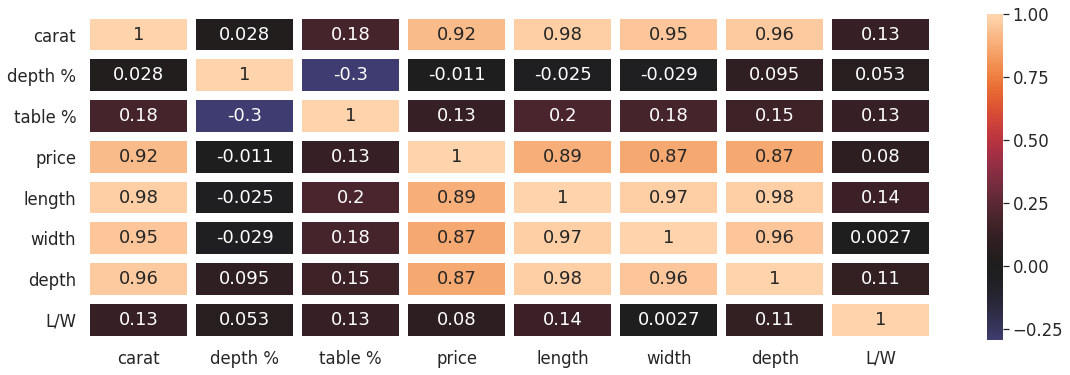

In [0]:
f, ax = plt.subplots(figsize=(19, 6))
sns.heatmap(data.corr(), annot=True, linewidths=8, center=0,ax=ax)

From the above plot, We can see that carat, length, width, depth, and price are having a high correlation with each other. 

However, the categorical data is not taken into account. Since these categories are considered as essential factors for pricing the diamond, therefore, we will compare each category feature with the price.

####Color Vs Price


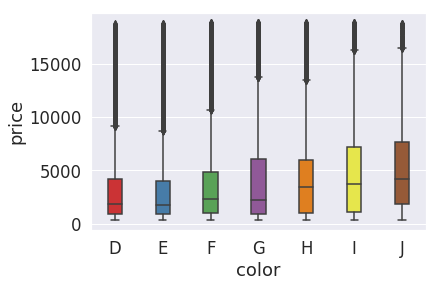

In [0]:

sns.boxplot(y='price',data=data,x='color',palette ='Set1',width =0.3,order = ['D','E','F','G','H','I','J'] )
# 
# 

# data.boxplot('price','cut',rot = 30,figsize=(5,6)) 
# data.boxplot('price','clarity',rot = 30,figsize=(5,6))

From the above plot, we can see that G, H,  I and J type color has less number of outliers compared to D and E.It suggests that the better the quality of color the higher the outliers except for G type color. Also, each category type has the same maximum and minimum price.

####Cut Vs Price

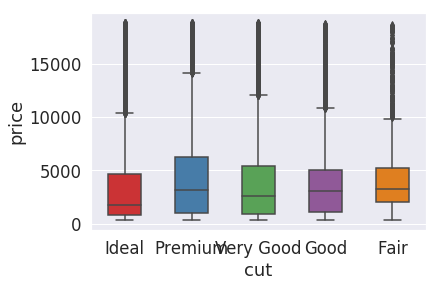

In [0]:
sns.boxplot(y='price',data=data,x='cut',palette ='Set1', width =0.5,order =['Ideal' ,'Premium' ,'Very Good' ,'Good' ,'Fair'] )

From the above plot, we can see that the lower the quality of cut, the higher the number of outliers except for the Ideal cut type. Also, each category type has the same maximum and minimum price.

####Clarity Vs Price

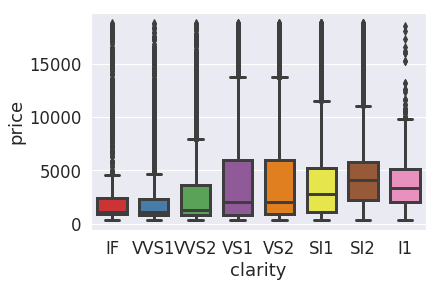

In [0]:
sns.boxplot(y='price',data=data,x='clarity',palette ='Set1', width =0.7,linewidth=3,order =['IF','VVS1','VVS2','VS1','VS2','SI1','SI2','I1'])

From the above plot, we can see that IF, VVS1 and VVS2 have a high number of outliers compared to other categories of color. Moreover VS1,VS2 are having less number of outliers compared to others.Also, each category type has the same maximum and minimum price.

#### Clarity vs cut

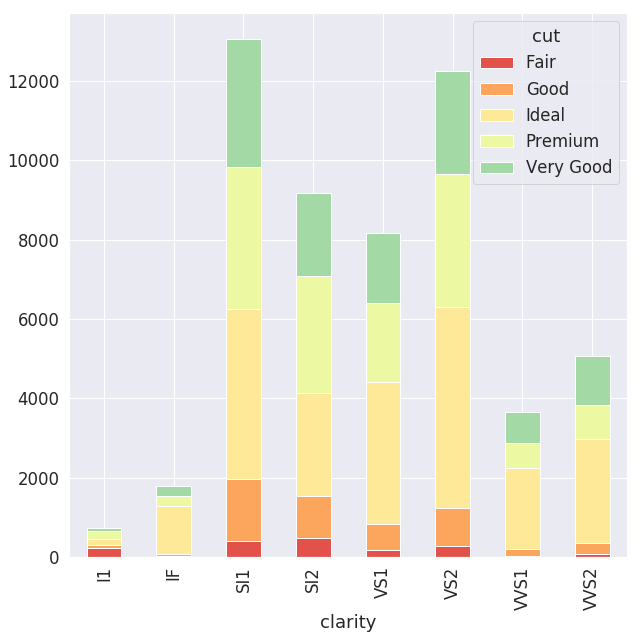

In [0]:
clarity_cut_table = pd.crosstab(index=data["clarity"], columns=data["cut"])

clarity_cut_table.plot(kind="bar", 
                 figsize=(10,10),
                 stacked=True)

We can see that from above that most of the people prefer to buy diamond of SI1 clarity followed by VS2, SI2, and VS1.In that, the cut they prefer is Ideal, Premium, and very good's diamond cut category. Moreover, we can infer that people are not taking the highest clarity diamonds, such as IF or VVS1 and others . and are ready to sacrifice on clarity but are more focusing on the cut of the diamonds.

Let us figure it out by plotting the cut vs. clarity.

#### Cut vs Clarity

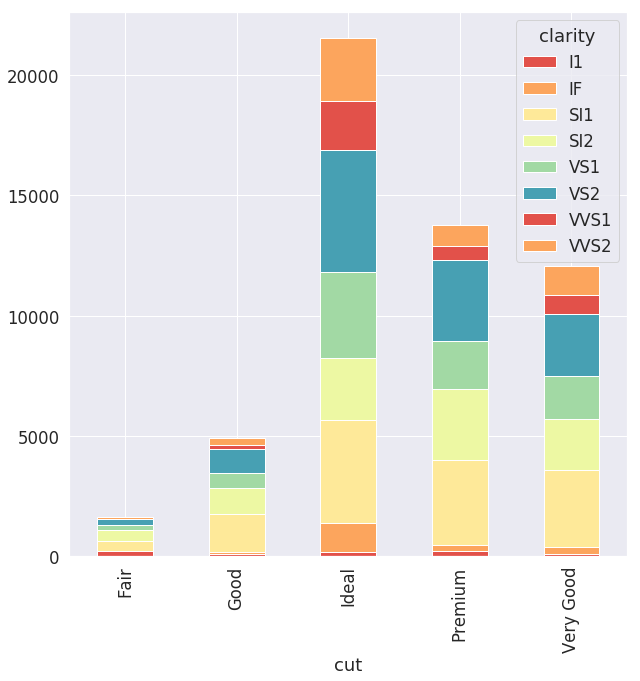

In [0]:
cut_clarity_table = pd.crosstab(index=data["cut"], columns=data["clarity"])

cut_clarity_table.plot(kind="bar", 
                 figsize=(10,10),
                 stacked=True)

We can see that people prefer Ideal cut over any other cut diamonds followed by Premium and Very Good. It suggests that people are focusing on cut than clarity.

Now let us check the priority of the color.

#### Color Vs Clarity

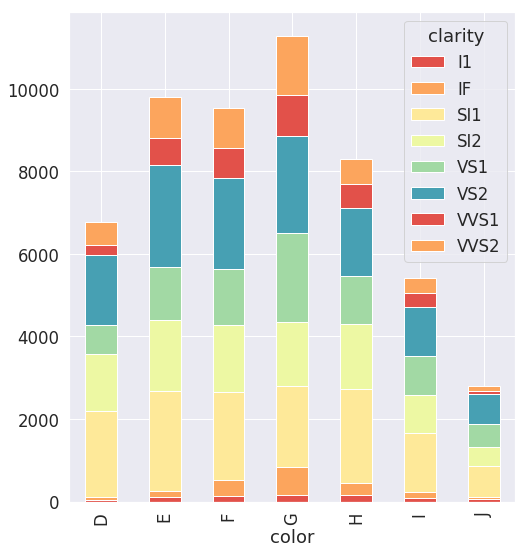

In [0]:
color_clarity_table = pd.crosstab(index=data["color"], columns=data["clarity"])

color_clarity_table.plot(kind="bar", 
                 figsize=(8,9),
                 stacked=True)

We can see that from above that most of the people prefer G color followed by E, F, and H.In that the clarity they mostly prefer SI1 or SI2 category. 

Therefore from above all the plots, we can conclude that carat has high importance followed by cut, color, and clarity in predicting the price of a diamond.


Now let us check all the other continuous data type features with price using a scatter plot to check the linearity.

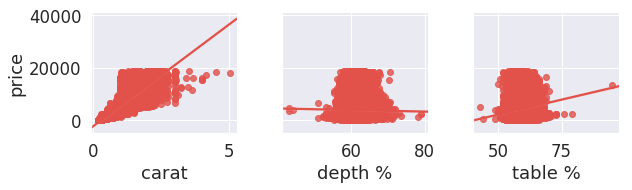

In [0]:
g= sns.pairplot(data , height=3, aspect =1, x_vars = ['carat','depth %','table %'] , y_vars =  ['price'] , kind = 'reg')

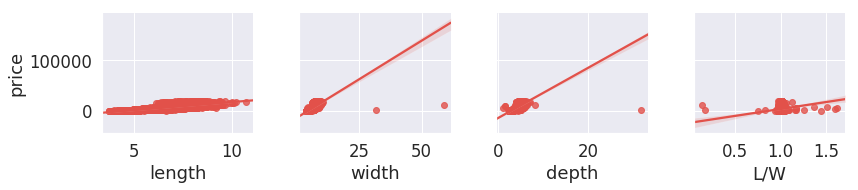

In [0]:
g= sns.pairplot(data , height=3, aspect =1, x_vars = ['length','width','depth','L/W'] , y_vars =  ['price'] , kind = 'reg')

We could see that carat, length, width, and depth are showing linearity with price with fewer outliers and table %, depth %, and L/W are showing linearity but with high outliers.

###Part E - Report Initial Findings

From the above analysis, we could say that carat,length, width, depth  are an essential factor in deciding the price of a diamond. However, other features also play an essential role  such as cut, clarity, and color, Length/Width, depth percentage, and table percentage. However, some of the features have a considerable number of outliers. Therefore, We have to use regression-based machine learning algorithms to determine the price of a diamond based on some of the potential features such as polynomial, Linear, and RandomForest regression algorithms to create our model.



###Part A - Determine a Proper Model

### Data Transformation

In the previous assignment, we have discussed the diamond dataset and the feature present in it. Moreover, we derived our problem statement, which is "How to determine the price of a diamond. ?" and guessed what kind of modeling techniques we have to implement.

In this assignment, we will apply those modeling techniques and choose the best algorithm based on the algorithm's performance.

Since our problem statement indicates that we have to predict continuous data(price) based on other features using machine learning algorithms. Hence, we have to convert the categorical data into numerical as the regression-based machine learning algorithms will predict the continuous data based on the other feature of type continuous.

Hence, we will convert the categorical data into numerical by assigning a weight depending upon the importance of each categorical value present in the feature.

In [0]:
data['clarity_score']=data['clarity'].replace(['IF','VVS1','VVS2','VS1','VS2','SI1','SI2','I1'],[8,7,6,5,4,3,2,1])
data['color_score'] = data['color'].replace(['D','E','F','G','H','I','J'],[7,6,5,4,3,2,1])
data['cut_score'] = data['cut'].replace(['Ideal','Premium','Very Good','Good','Fair'],[5,4,3,2,1])

data.head()

,carat,cut,color,clarity,depth %,table %,price,length,width,depth,L/W,clarity_score,color_score,cut_score
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0.992462,2,6,5
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1.013021,3,6,4
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,0.995086,5,6,2
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0.992908,4,2,4
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0.997701,2,1,2


In [0]:
data_score = data.copy()


In [0]:

X=DataFrame(data_score,columns =['carat','cut_score','clarity_score','color_score','table %','depth %','L/W','depth','length','width'])
Y=DataFrame(data_score,columns =['price'])



In [0]:
skY=data['price'].skew()
skY

1.6183486340820077

In [0]:
data_score = DataFrame({'price':np.log(data_score['price'])})


In [0]:
sk=data_score['price'].skew()
sk

0.11546088919707363

A normal distribution has very few occurrences in the tails. Having more data points in any of the tails is called skew. However, Normal distribution is entirely symmetrical, which means the right and left tail has the same size i.e., the skew of the normal distribution is zero. The more the number of outliers in data, the higher the value of skew. In turn, the prediction of outliers will be challenging by a regression algorithm.

From the below visualization, we could see that in our distribution of diamond price, the data points are skewed to the left and have a value of 1.618. Therefore, we need to transform our price data in such a way that the skew must be near to zero.we have used log transformation on the price, and the skew value became 0.115.

To conclude, The log transformation is done to reduce the skew of price data distribution, which will benefit us from getting a Higher $R^2$ value and also an accurate model.

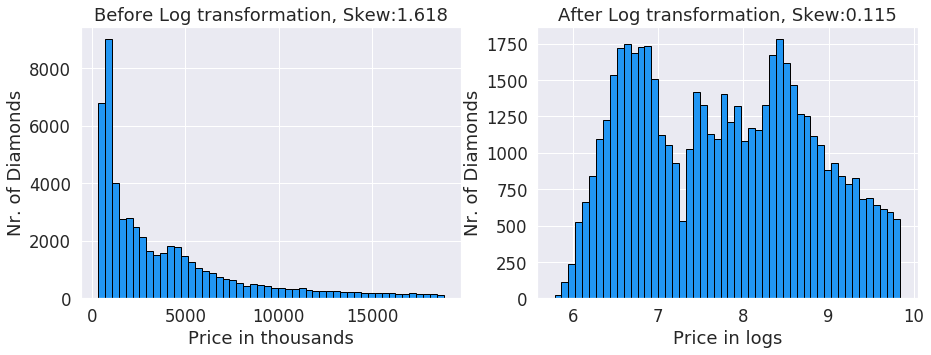

In [0]:
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
plt.hist(data['price'], bins=50, ec='black', color='#2196f3')
plt.xlabel('Price in thousands')
plt.ylabel('Nr. of Diamonds')
plt.title(f'Before Log transformation, Skew:{round(skY,3)}')

plt.subplot(1,2,2)
Y = np.log(Y['price'])
plt.hist(Y, bins=50, ec='black', color='#2196f3')
plt.xlabel('Price in logs')
plt.ylabel('Nr. of Diamonds')
plt.title(f'After Log transformation, Skew:{round(sk,3)}')
plt.show()

As we have selected our features, we are going to split the dataset into train and test set where 80 percent of the data will go into the training set, and the remaining 20 percent will go into the test.

In [0]:

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=10)
# Y_train = DataFrame(Y_train)
# Y_test=DataFrame(Y_test)



In [0]:
# scale = StandardScaler()
# X_train = DataFrame(scale.fit_transform(X_train[['carat','depth %','table %','length','width','depth', 'clarity_score' ,'color_score', 'cut_score','L/W']]),columns=['carat','depth %','table %','length','width','depth', 'clarity_score' ,'color_score', 'cut_score','l/W'],index=X_train.index)
# X_test = DataFrame(scale.transform (X_test[['carat','depth %','table %','length','width','depth', 'clarity_score' ,'color_score', 'cut_score','L/W']]),columns=['carat','depth %','table %','length','width','depth', 'clarity_score' ,'color_score', 'cut_score','l/W'],index=X_test.index)
# print(X_train.head())


Instead of transforming the whole dataset, we are only transforming training and test data separately. Because if we convert the whole dataset, information about the distribution of the dataset will be known by algorithms, which means it cannot process the outliers efficiently. Therefore, we want the test data to be "new and unseen" by our machine learning algorithm and the target value of test data only be predicted by using the distribution value of the training dataset.

###Regression Model

Now before implementing the regression model. Let us understand the assumptions of the regression model as well as it is evaluation.


<b>Assumptions of the Regression Model</b><br>

The regression model makes an assumption about the data, and based upon that; It predicts the target value. If these assumptions are not fulfilled, then the model will not predict an accurate value.(Analytics and Going Deeper into Regression Analysis with Assumptions, 2019).

Essential assumptions of regression are as follows:-
<ol>
  <li>There should be no multi-collinearity.</li>
  <li> There should be no correlation between residuals. If there is a correlation, then it called Autocorrelation.</li>
   <li>The residual value should be random i.e.; there should be no pattern. 
<br>If there is a pattern in the residuals, then there also some predictive information in the residuals and if there is predictive information in the residuals, then the predictive information is missing from the model.     </li>
  
  <li>Residual should be normally distributed. i.e., the mean and the skew should be equal or near to zero.</li>
     
  </ol>
 <b>Evaluation of a Regression Model</b><br>
There are several parameters to check a regression model. However, we are going to focus on three essential aspects.
<ol>

<li>Mean Squared Error (MSE) -> It is an average of the sum of the square of residuals, Which represents an absolute value in the units of the target value.</li>
<li>R- Sqaure($R ^ 2$)  ->It represents how much variation a target value has against the features and  shows a relative measure in the range of 0 and 1.</li>
<li>Adjusted $R ^ 2$    -> $R ^ 2$ only increases or remains constant but never decreases even if the model is less precise. However, Adjusted $R ^ 2$ only increases if the model is increasing the precision. It is calculated using the below formula.</li>
  
  $$1 -  \frac{(1 - r2) *(n - 1)}{(n-p-1))}$$
  
  
where
R2 = R square

p = Number of features

N = Total Number of rows
</ol>
<b>Ploting the Regression Model</b><br>
Let us also understand, How to plot the regression models and validate them.<br>
For a single feature regression model, the best way to visualize it is by showing the best fit line between the independent feature and the target value. However, if it is a multivariate regression, We have to increase the dimensionality of the graph depending upon the number of features which can lead to visual clutter and the user cannot understand the model correctly.<br>
However, to visualize the multivariate model, we can plot three types of a graph to validate the model which are discussed below.

<b>1.Ploting Predicted Values Vs Actual Values</b><br>
  
The rationale behind plotting actual and predicted values is to check how good our prediction is and how our prediction stack up to the actual diamond prices.
To check the difference between predicted and actual values in the graph we will draw a straight line as if it had the perfect predictive capabilities which mean plotting   the best-fit line as if the  r-squared value is 1.This would allow us to see how our predictions stack up to the actuals very very clearly by comparing data points with best-fit line.

The bigger the distance of a point from the line, the bigger the residual or the error.


  
<b>2.Ploting Predicted Values Vs Residual Values</b><br>
In the above plotting method, we cannot see the residuals explicitly. We can only see how far the data points are from the line.
This plot also will tell us if there is any pattern in the residuals that exists or not.
  
<b>3.Plotting the distribution of residuals</b><br>
This plot will tell us if the residuals assumption is satisfied or not.


### Linear Regression

Before implementing this algorithm let us understand how it works <br>
Linear regression is used to predict a constant value or a continuous target value from one or multiple features.
In another term, it provides us a line equation such as below if linear regression is based on a single variable.

$$y=\theta x+c$$
 else if it is multiple regression, then it provides the below equation.
 
$$y=\theta_0x_0 +\theta_1x_1+\theta_2x_2....+\theta_nx_n + c $$

Where y is, our target or independent value and $\theta$ is slope or coefficient, which means the rate of change of the independent variable at a certain point. It also suggests the importance of an independent variable on predicting the target value and $c$ is constant and also called as intercept.

Graphically single variable linear regression is represented by a best-fit line, which represents the difference between actual values and the predicted values i.e., also called residual.(Analytics, B. and A comprehensive beginners guide for Linear, R. (2019)).

The lesser the residual better the predicted values.


Now let us implement our Linear regression model and evaluate our model.

In [0]:
dlin = LinearRegression()
dlin.fit(X_train, Y_train)
y_pred = dlin.predict(X_test)
print('####### Linear Regression #######')
print('Score : %.4f' % dlin.score(X_test, Y_test))
mse = mean_squared_error(Y_test,y_pred)
r2 = r2_score(Y_test, y_pred)
print('')
print('MSE    : %0.2f ' % mse)
print('R2     : %0.2f ' % r2)
n=X_test.shape[0]
p=X_test.shape[1]
adj_rsquared = 1 - (1 - r2) * ((n - 1)/(n-p-1))
print('Adjusted R Squared: {}'.format(adj_rsquared))


####### Linear Regression #######
Score : 0.9787

MSE    : 0.02 
R2     : 0.98 
Adjusted R Squared: 0.9786957028785375


From the above output, we can see that ($R ^ 2$)  value is 0.97  and MSE is 869465. Based on the score, we can that this model prediction is accurate. However, we need to analyze regression assumptions such as multicollinearity, autocorrelation, hetroskedacity, and normal distribution to validate our regression model.

Before checking the assumptions let us check the significance of each coefficient as these will let us determine which feature are important and which are not.<br><br>
###<b>Feature Selection</b><br>
<b>P-values</b><br>
p- values represent the significance of a coefficient; if the p-value is less than a threshold of 0.05, the coefficient is deemed statistically significant else not significant.(Editor, 2019).

However, To calculate the p-values, scikit-learn is not much of a help. Therefore, to look at the detailed statistics of our model, we will be using the Statsmodel module. It provides a lot of statistical methods that are useful in evaluating a regression model and also some methods which are useful in validating the features.


Now let us run our regression with this new module.

The thing to note is that in order to make our regression tie out with scikit-learn we are going to have

to add an intercept because from the above-implemented model, we could see that an intercept was calculated from our scikit-learn regression model.

So we have to take our features from the training data set and add an intercept using Statsmodel's add_constant() function. Further which the return value from the add_contant() function will be passed to Ordinary Least Square(OLS) method which implements a linear regression model.

Moreover, after passing the feature and target into the OLS method, we will generate the p-values and coefficients.

In [0]:
X_incl_const = sm.add_constant(X_train)
type(X_incl_const)
X_incl_const.shape
model = sm.OLS(Y_train,X_incl_const)
results = model.fit()

# # #results.params
# # #results.pvalues

pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})


,coef,p-value
const,-2.411887,0.0
carat,-1.091160,0.0
cut_score,0.025689,0.0
clarity_score,0.121382,0.0
color_score,0.078019,0.0
table %,0.008384,0.0
depth %,0.058951,0.0
L/W,-2.164964,0.0
depth,0.038924,0.0
length,1.428732,0.0


We could see that from the above output all the feature coefficient's p-values are less than 0.05. Therefore, all the features are statistically significant in determining the price of a diamond.

Now we will check if there is any multicollinearity in the model.
Multicollinearity occurs when two or more features variables in regression are highly related to one another.

In that case, they do not provide unique or independent information to the model and can lead to
 loss of reliability in the estimates of the effects for the individual features.
<br><br>
<b>Variance Inflation factor(V.I.F)</b></br>
We can check the multicollinearity in the model using a statistical factor called V.I.F., which is also called a Variance Inflation factor(V.I.F.).
If V.I.F. is less than a threshold of 10 means that the feature is not co-related to other feature else multicollinearity exists in the model.(Newonlinecourses.science.psu.edu, 2019).



In [0]:
vif = [variance_inflation_factor(exog=X_incl_const.values, 
                                 exog_idx=i) for i in range(X_incl_const.shape[1])]

pd.DataFrame({'coef_name': X_incl_const.columns, 
             'vif': np.around(vif, 2)})

,coef_name,vif
0,const,15895.92
1,carat,25.14
2,cut_score,1.50
3,clarity_score,1.24
4,color_score,1.12
5,table %,1.62
6,depth %,1.76
7,L/W,1.60
8,depth,24.42
9,length,76.50


From the above, we could see that the feature carat, length, width, and depth are having high collinearity with each other. As we know carat has a high correlation with predicting the price and is one of the critical features in determining the price of a diamond, let us delete the length,  width and depth column and check the VIF values to see if there are any values greater than 10 or not.


In [0]:
# Reduced model #1 excluding carat
X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['length','width','depth'], axis=1)

model = sm.OLS(Y_train, X_incl_const)
results = model.fit()

coef_minus_indus = pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

r2_lr=results.rsquared
mse_lr =results.mse_resid
ar2_lr =results.rsquared_adj
ar2_lr = results.rsquared_adj
print('r-squared is', r2_lr)
print('MSE is', results.mse_resid)
print('Adjusted R -sqaure is', results.rsquared_adj)
vif = [variance_inflation_factor(exog=X_incl_const.values, 
                                 exog_idx=i) for i in range(X_incl_const.shape[1])]

pd.DataFrame({'coef_name': X_incl_const.columns, 
             'vif': np.around(vif, 2)})

r-squared is 0.8808161269294701
MSE is 0.1223254805940174
Adjusted R -sqaure is 0.8807967824870778


,coef_name,vif
0,const,11650.35
1,carat,1.30
2,cut_score,1.50
3,clarity_score,1.21
4,color_score,1.12
5,table %,1.61
6,depth %,1.33
7,L/W,1.06


From the above output, we can see that there are no features that are co-related with each other as all the feature's VIF value is less than 10.However our model's accuracy has been decreased as the R-square, and MSE value has been reduced to 0.85.

Now if we look back at our first regression in which we took all the features , there were 3 features which were co-related with each other , which means there will a high amount of uncertainty and an incorrect conclusion in determining the importance of a feature and also there will be high standard errors which will lead to higher intervals or ranges. Overall, the model with all the features was incorrect.

Now let us plot the graph to understand more about the model and validate the regression assumptions.

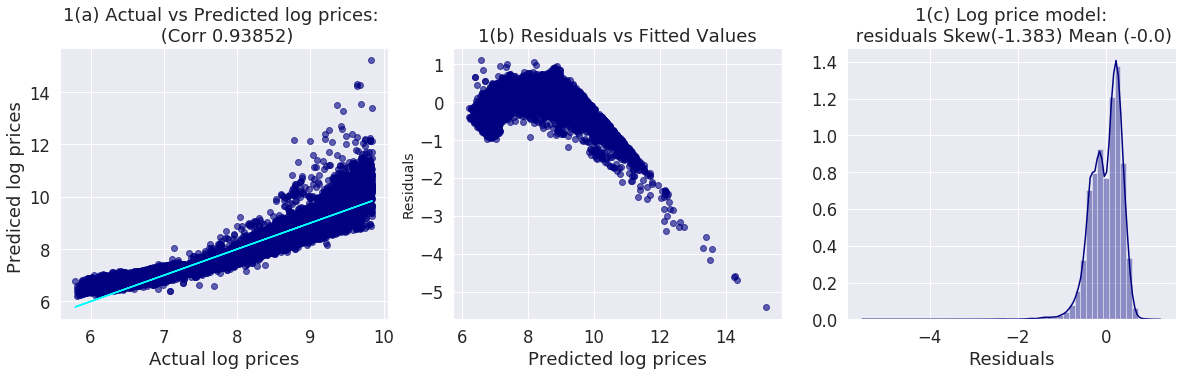

In [0]:
del X_train['length']
del X_train['width']
del X_train['depth']
# X_train.head()

del X_test['length']
del X_test['width']
del X_test['depth']
# Using Statsmodel
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(Y_train, X_incl_const)
results = model.fit()

plt.figure(figsize=[20,5])
plt.subplot(1,3,1)

corr = round(Y_train.corr(results.fittedvalues), 5)
plt.scatter(x=Y_train, y=results.fittedvalues, c='navy', alpha=0.6)
plt.plot(Y_train, Y_train, color='cyan')

plt.xlabel('Actual log prices')
plt.ylabel('Prediced log prices ')
plt.title(f'1(a) Actual vs Predicted log prices: \n (Corr {corr})')


plt.subplot(1,3,2)
# Residuals vs Predicted values

plt.scatter(x=results.fittedvalues, y=results.resid, c='navy', alpha=0.6)

plt.xlabel('Predicted log prices')
plt.ylabel('Residuals', fontsize=14)
plt.title('1(b) Residuals vs Fitted Values')

# Distribution of Residuals (log prices) - checking for normality
resid_mean = round(results.resid.mean(), 3)
resid_skew = round(results.resid.skew(), 3)
# print(resid_mean)
# print(resid_skew)
plt.subplot(1,3,3)
sns.distplot(results.resid, color='navy')
plt.xlabel('Residuals')

plt.title(f'1(c) Log price model:\n residuals Skew({resid_skew}) Mean ({resid_mean})')
plt.show()

#### Plotting Linear Regression Model

From the above <b> Figure 1(a) Predicted vs. Actual Values</b>, We could say that a lot of predicted values are very close to the line. (This line is not the best fit line for this scatter plot. The line here shows where a point would be if our prediction were perfect and residuals would be equal to zero.).
However, If we look at the top right and the bottom left, we could see that for some of the data points the residuals are actually very large, and our model is performing quite poorly for those data points. These points are outliers. Therefore, we could say that the linear regression model is working poorly for the outliers.

From the above <b> Figure 1(b)Residuals vs. Predicted values </b>, We could say that there is a pattern in the residuals which is the higher the log diamond's prices lesser the residual, again these data points are outliers in the data.
Therefore, We could say that one of the assumptions is not being held up by this model.

From the above  <b>Figure 1(c)Distribution of Residuals  </b>, We could say that that the residuals are asymmetrical and they are more spreading in the left direction.
Furthermore, we notice that this distribution in contrast to a normal distribution
has much longer tails as well as two bigger peaks. So there are more values in the extreme left than what we would see with a normal distribution. Therefore, the residual values are not normally distributed.

Overall, This model is not able to satisfy the regression assumptions and also not able to accurately predict the outliers.


### Polynomial Regression


Before implementing this algorithm, let us understand the polynomial regression in detail.

To handle the non-linear data, we use the Polynomial Regression model. It works by adding extra independent variables that are powers of the original variables ($x$,$x^1$,$x^2$,.etc). into the model<br>
Power of the independent variable must be greater than 1.<br>
a best-fit curve is used to represent a single feature polynomial regression in a graph.
We can use any order of polynomials. However the higher the order of polynomial greater the risk of overfitting the model.<br>
On our data, we are going to use second-order polynomial, and the model is calculated based on the below equation.
$$y=\theta_0 +\theta_1x+\theta_2x^2$$

where y is our predicted value, x is our independent variable and $\theta$'s are coefficients.
This equation is calculated for each feature in our model.
.

In [0]:
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.fit_transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, Y_train)

y_test_predict = poly_model.predict(X_test_poly)

r2_pr =poly_model.score(X_test_poly, Y_test)

print('####### Polynomial Regression #######')
print('Test R2 Score : %.4f' % r2_pr)


mse_pr = mean_squared_error(Y_test, y_test_predict)
rmse_pr = mean_squared_error(Y_test, y_test_predict)**0.5
r2 = r2_score(Y_test, y_test_predict)

print('')
print('MSE    : %0.2f ' % mse_pr)
print('RMSE   : %0.2f ' % rmse_pr)
print('Actual-Predicted R2 Score     : %0.2f ' % r2)

n=X_test.shape[0]
p=X_test.shape[1]


ar2_pr = 1 - (1 - r2) * ((n - 1)/(n-p-1))
print('Adjusted R Squared: {}'.format(ar2_pr))
# pd.DataFrame(data=, index=X.columns, columns=['coef'])


####### Polynomial Regression #######
Test R2 Score : 0.9670

MSE    : 0.03 
RMSE   : 0.19 
Actual-Predicted R2 Score     : 0.97 
Adjusted R Squared: 0.9670137763532991


We can see that from the above output, the $R^2$ value has been increased drastically to 0.95, and the Mean squared error value also has been reduced compared to the previous model. Now let us plot the model to validate the assumptions and the predicted values.

-0.0
15.036


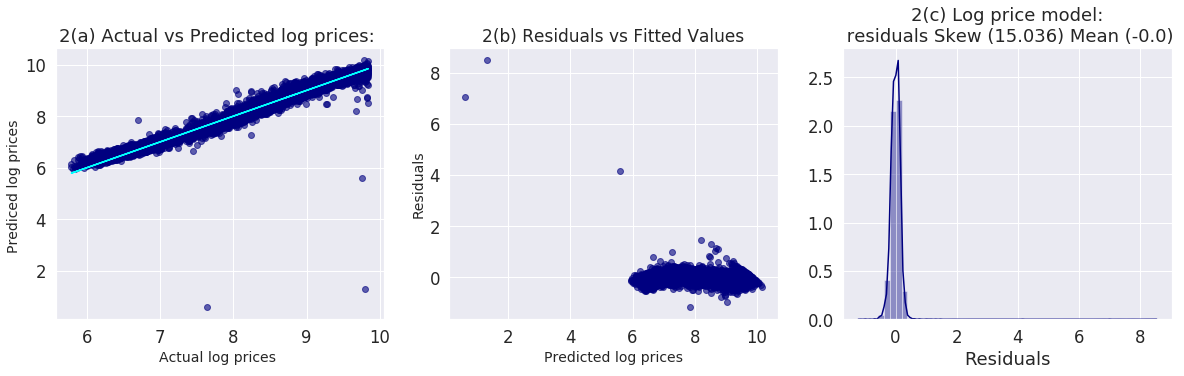

In [0]:
plt.figure(figsize=[20,5])
plt.subplot(1,3,1)

plt.scatter(x=Y_test, y=y_test_predict, c='navy', alpha=0.6)
plt.plot(Y_train, Y_train, color='cyan')


# corr = round(Y_train.corr(y_test_predict), 2)
plt.xlabel('Actual log prices ', fontsize=14)
plt.ylabel('Prediced log prices ', fontsize=14)
plt.title(f'2(a) Actual vs Predicted log prices: ')

plt.subplot(1,3,2)


# Residuals vs Predicted values

plt.scatter(x=y_test_predict, y=(Y_test - y_test_predict), c='navy', alpha=0.6)

plt.xlabel('Predicted log prices', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('2(b) Residuals vs Fitted Values', fontsize=17)

plt.subplot(1,3,3)
# Distribution of Residuals (log prices) - checking for normality
resid_mean = round((Y_test - y_test_predict).mean(), 3)
resid_skew = round((Y_test - y_test_predict).skew(), 3)
print(resid_mean)
print(resid_skew)

sns.distplot((Y_test - y_test_predict), color='navy')
plt.xlabel('Residuals')
plt.title(f'2(c) Log price model:\n residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()

####Plotting Polynomial Regression Model

From the above <b> Figure 2(a) Predicted vs. Actual Values</b>, We could say that a lot of predicted values are very close to the line. (This line is not the best fit line for this scatter plot. The line here shows where a point would be if our prediction were perfect and residuals would be equal to zero.).
However, comparing with our linear regression model, the predicted are performing accurately with all the data points except the top-left point(an outlier).


From the above <b> Figure 2(b)Residuals vs. Predicted values </b>, We could say that there is no pattern in the residuals. However, at the bottom right corner, one data point is standing alone, which is an outlier.
Therefore, We could say that this model is somewhat holding up by the assumptions of no pattern in residuals better than the linear regression model.

From the above  <b>Figure 2(c)Distribution of Residuals  </b>, We could say that that the residuals are relatively symmetrical and they are spreading more in the left direction than in the right.
Furthermore, we notice that this distribution in contrast to a normal distribution
has much longer tails. So there are more values in the extremes than what we would see with a normal distribution. Therefore, this model is residual values equivalent to the normal distribution and also compared to the linear regression model, the residual skew value is now closer to zero.

Overall, This model can satisfy the regression assumptions and also able to accurately predict the values. However, for some outliers, it is not able to predict accurately.

### RandomForest Regression

Before implementing this algorithm, let us understand the Random Forest in detail.

Random Forest is made out of decision trees. Before going further, let us understand about decision trees.

Decision trees are predictive algorithms that use a set of trees(based on the number of features)  to predict a target value.


It combines the simplicity of decision trees with flexibility
resulting in a vast improvement in accuracy.<br>
It creates a bootstrapped dataset by randomly selecting samples from the original dataset, and an interesting factor here is that it can select the same sample more once.<br>
After creating a bootstrapped dataset, it creates a decision based on the bootstrapped dataset but only uses a random subset of features at each step.<br>
This process of creating a bootstrapped dataset and building a decision tree based on a subset of the feature is repeated  'N' number of times. This result in a wide variety of trees which in turn makes the random forest more effective than individual trees.<br>
After creating the trees it will predict the value or make the decision based on the aggregate of the target value which was determined by each decision trees.this process is also called as bagging.<br>


In [0]:
rf = RandomForestRegressor()
rf.fit(X_train , Y_train)
# accuracies = cross_val_score(estimator = clf_rf, X = X_train, y = Y_train, cv = 4,verbose = 1)
y_pred = rf.predict(X_test)
r2_rf =rf.score(X_test, Y_test)
print('')
print('###### Random Forest ######')
print('Testdata R2 :Score : %.4f' % r2_rf )
# print(accuracies)
mse_rf = mean_squared_error(Y_test, y_test_predict)
rmse_rf = mean_squared_error(Y_test, y_pred)**0.5
r2 = r2_score(Y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse_rf)
print('RMSE   : %0.2f ' % rmse_rf)
print('actual-predicted R2     : %0.2f ' % r2)

ar2_rf = 1 - (1 - r2) * ((n - 1)/(n-p-1))
print('Adjusted R Squared: {}'.format(ar2_rf))




###### Random Forest ######
Testdata R2 :Score : 0.9922

MSE    : 0.03 
RMSE   : 0.09 
actual-predicted R2     : 0.99 
Adjusted R Squared: 0.992236316065668


We can see that from the above output the $R^2$ value has been increased drastically to 0.99 and the Mean squared error value also has been reduced compared to the previous model and also RMSE has decreased to 0.03 compared to other models. Therefore, we can our model is predicting the values accurately compared to the other models. However, let us plot the model to validate the assumptions and the predicted values.

0.001
0.213


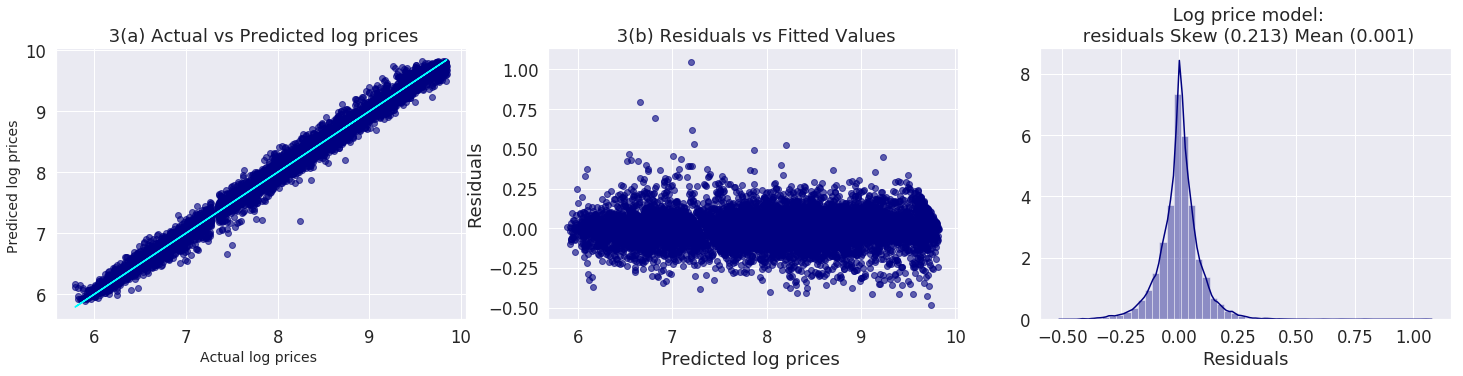

In [0]:
plt.figure(figsize=[25,5])
plt.subplot(1,3,1)

plt.scatter(x=Y_test, y=y_pred, c='navy', alpha=0.6)
plt.plot(Y_train, Y_train, color='cyan')

plt.xlabel('Actual log prices ', fontsize=14)
plt.ylabel('Prediced log prices ', fontsize=14)
plt.title(f' 3(a) Actual vs Predicted log prices')

plt.subplot(1,3,2)


# Residuals vs Predicted values

plt.scatter(x=y_pred, y=(Y_test - y_pred), c='navy', alpha=0.6)

plt.xlabel('Predicted log prices ',)
plt.ylabel('Residuals', )
plt.title(' 3(b) Residuals vs Fitted Values')

plt.subplot(1,3,3)
# Distribution of Residuals (log prices) - checking for normality
resid_mean = round((Y_test - y_pred).mean(), 3)
resid_skew = round((Y_test - y_pred).skew(), 3)
print(resid_mean)
print(resid_skew)

sns.distplot((Y_test - y_pred), color='navy')
plt.xlabel('Residuals')
plt.title(f' Log price model:\n residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()

####Plotting Random Forest Regression Model

From the above <b> Figure 3(a) Predicted vs. Actual Values</b>, We could say that a lot of predicted values are very close to the line. (This line is not the best fit line for this scatter plot. The line here shows where a point would be if our prediction were perfect and residuals would be equal to zero.).This graph further suggests that this model, compared to other previous models, can predict the prices more accurately. However, if we look at below the line, for some data points, the residual is quite large.



From the above <b> Figure 3(b)Residuals vs. Predicted values </b>, We could say that there is no pattern in the residuals. It shows a cloud shape where most of the residual are centered around zero, and the cloud is more or less symmetrical, and there is not any bias for low and high predicted values.

From the above  <b>Figure 3(c)Distribution of Residuals  </b>, We could say that that the residuals are symmetrical and they are equally spreading on both of the tails.
Furthermore, we notice that this distribution in contrast to a normal distribution has fairly a longer tails. So there are more values in the extremes than what we would see with a normal distribution.Therefore , this model's residual values are equivalent to the normal distribution and also compared to the other previous regression model, the residual skew value is now closer to zero.i.e 0.2.

Overall, This model can satisfy the regression assumptions and also able to accurately predict the value. Moreover, It can predict the values better than other regression models based on our evaluation scores.

In [0]:
pd.DataFrame({'AdjustedR-Sqr': [ar2_lr, ar2_pr, ar2_rf],
              'R-Squared': [r2_lr, r2_pr, r2_rf],
             'MSE': [mse_lr, mse_pr, mse_rf], 
             'RMSE': np.sqrt([mse_lr, mse_pr, mse_rf])
             }, 
            index=['Linear Regression', 'Polynomial Regression', 'RandomForest Regression'])

,AdjustedR-Sqr,R-Squared,MSE,RMSE
Linear Regression,0.880797,0.880816,0.122325,0.349751
Polynomial Regression,0.967014,0.967035,0.034338,0.185304
RandomForest Regression,0.992236,0.992241,0.034338,0.185304


From the above output, we can say RandomForest Regression can predict the values better than any other model as the evaluation score are accurate compared to others, and also it satisfies the regression assumptions.
Note:  As discussed before the MSE values are absolute and take up the unit of the dependent variable, thus, MSE and RMSE  for each model are in the units of the log.

### Part- D Discussion

In this section, we will create a function that will take a data frame consist of diamond features as an argument and will return the predicted price and the range of the predicted price.

In [0]:
def test(testData):

  # Data Transformation
  testData['clarity_score']=testData['clarity'].replace(['IF','VVS1','VVS2','VS1','VS2','SI1','SI2','I1'],[8,7,6,5,4,3,2,1])
  testData['color_score'] = testData['color'].replace(['D','E','F','G','H','I','J'],[7,6,5,4,3,2,1])
  testData['cut_score'] = testData['cut'].replace(['Ideal','Premium','Very Good','Good','Fair'],[5,4,3,2,1])
  
  X=DataFrame(testData,columns =['carat','cut_score','clarity_score','color_score','table %','depth %','L/W'])
  Y= rf.predict(X)
  
  upper_bound = Y + rmse_rf
  lower_bound = Y - rmse_rf
  print(f'The price predited by our model is {round(np.e**Y[0],2)}')
  print(f'The price predited by our model is in range between {round(np.e**lower_bound[0],2)} \
and {round(np.e**upper_bound[0],2)}')


Now we will create two data frame which consists of diamond features.
The features data will be selected randomly within the range of the dataset, and we will check if it can predict the price accurately or not.

In [0]:
testData=pd.DataFrame({'carat': 1.01,
                                      'clarity': 'IF' ,
                                      'cut': 'Ideal', 
                                      'color': 'D',
                                      'table %': 56 ,
                                      'depth %' : 54.9,
                                      'L/W' : 1.00
                                      }, index =[0])


In [0]:
test(testData)

The price predited by our model is 16277.91
The price predited by our model is in range between 14878.4 and 17809.07


In [0]:
testData1=pd.DataFrame({'carat': 2.01,
                                    'clarity': 'IF' ,
                                    'cut': 'Ideal', 
                                    'color': 'D',
                                    'table %': 56,
                                    'depth %' : 54.9,
                                    'L/W' : 1.00
                                    }, index =[0])

In [0]:
test(testData1)


The price predited by our model is 14715.81
The price predited by our model is in range between 13450.6 and 16100.03


From the above, we can infer that this model can accurately predict the diamond price for the interpolation data. As we can see that the two data frames testData and testData1 which we created, have the same information except for the carat weight, and we found that the price predicted for testData is higher than the price predicted testData1 because the testData had a more significant carat weight than the testData1 carat weight.

Now let us check the model with Extrapolation data.

In [0]:
testData2=pd.DataFrame({'carat': 50,
                                    'clarity': 'IF' ,
                                    'cut': 'Ideal', 
                                    'color': 'D',
                                    'table %': 58,
                                    'depth %' : 65.5,
                                    'L/W' : 1.01
                                    }, index =[0])
test(testData2)

The price predited by our model is 16895.24
The price predited by our model is in range between 15442.65 and 18484.46


From the above, we can see that this model is not able to predict the price accurately As we have passed the same information again except the carat weight, which we have assigned a value of 50 and it predicted a price value which is lower than the previous test data where we passed the carat weight as 2.01.

Overall, This model can predict the price values accurately for the data which are in the range of this dataset. However, not able to predict accurately for the extrapolate data. 

### Part E - Summary

The goal of our analysis was to "How to determine the price of a diamond," and after in-depth analysis, we came to know that the features that affect the price of a diamond  when applied to our model are carat, cut, color, clarity, depth %, table % and length to width ratio.
Our model has an accuracy of 99 percent which no other model or algorithm has shown this much of precision in predicting the diamond price.
However, Due to the absence of Date Feature, this model is relative to this dataset only.

Overall, the prediction of our model is accurate. However, this model is not able to perform well with Extrapolation data due to insufficient data.

### References

[1].Analytics, B. and A comprehensive beginners guide for Linear, R. (2019). Linear, Ridge and Lasso Regression comprehensive guide for beginners. [online] Analytics Vidhya. Available at: https://www.analyticsvidhya.com/blog/2017/06/a-comprehensive-guide-for-linear-ridge-and-lasso-regression/ [Accessed 19 Aug. 2019].


[2].Analytics, B. and Going Deeper into Regression Analysis with Assumptions, P. (2019). Regression Analysis with Assumptions, Plots & Solutions. [online] Analytics Vidhya. Available at: https://www.analyticsvidhya.com/blog/2016/07/deeper-regression-analysis-assumptions-plots-solutions/ [Accessed 19 Aug. 2019].


[3].Newonlinecourses.science.psu.edu. (2019). 10.7 - Detecting Multicollinearity Using Variance Inflation Factors | STAT 462. [online] Available at: https://newonlinecourses.science.psu.edu/stat462/node/180/ [Accessed 19 Aug. 2019].

[4].Editor, M. (2019). How to Interpret Regression Analysis Results: P-values and Coefficients. [online] Blog.minitab.com. Available at: https://blog.minitab.com/blog/adventures-in-statistics-2/how-to-interpret-regression-analysis-results-p-values-and-coefficients [Accessed 19 Aug. 2019].


